In [7]:
import time
import os

import pandas as pd
from sklearn import cluster
from sklearn import metrics
from scipy.stats import describe
from scipy.spatial import distance
import numpy as np

import matplotlib.pyplot as plt
from skimage.io import imread, imshow

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1324: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


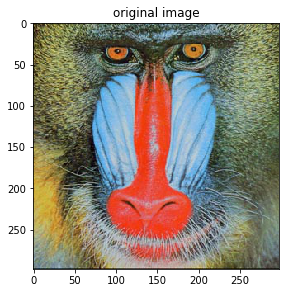

In [8]:
img = imread(os.path.join("imgs", "mandrill.jpg"))
imshow(img)
plt.title("original image")
plt.show()

In [9]:
def quantize(img, b):
    """
    Quantizes an image into 2^b clusters

    Parameters
    ----------
    img : a (H,W,3) numpy array
    b   : an integer
    
    Returns
    -------
    quantized_img : a (H,W) numpy array containing cluster indices
    colours       : a (2^b, 3) numpy array, each row is a colour
    """

    H, W, _ = img.shape
    model = cluster.KMeans(n_clusters=2**b)

    img = img.reshape(298*298, 3)
    model.fit(img)
    labels = np.array(model.labels_)
    quantized_img = labels.reshape(298, 298)
    
    return quantized_img, model.cluster_centers_.astype('uint8')

def dequantize(quantized_img, colours):
    H, W = quantized_img.shape
    img = np.zeros((H,W,3), dtype='uint8')

    for i in range(H):
        for j in range(W):
            for k in range(3):
                img[i, j, k] = colours[quantized_img[i, j], k]
                    
    return img

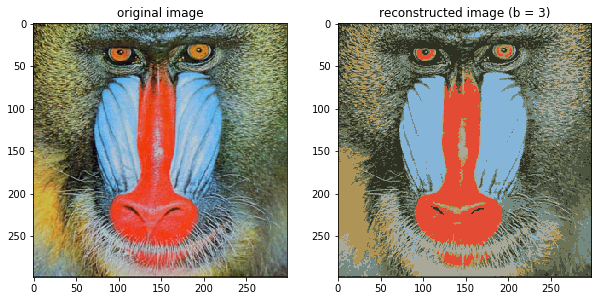

In [10]:
b = 3
compressed, colours = quantize(img, b = b)
recon = dequantize(compressed, colours)
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img)
ax[0].set_title("original image")
ax[1].imshow(recon) 
ax[1].set_title(f"reconstructed image (b = {b})");

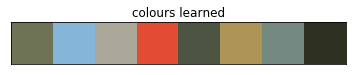

In [11]:
plt.imshow(colours[None])
plt.title("colours learned")
plt.xticks([])
plt.yticks([])
plt.show()

Time taken for b = 1 is 0.7686803340911865 seconds!
Time taken for b = 2 is 1.591939926147461 seconds!
Time taken for b = 4 is 8.07768702507019 seconds!
Time taken for b = 5 is 27.19477915763855 seconds!
Time taken for b = 6 is 54.51700186729431 seconds!


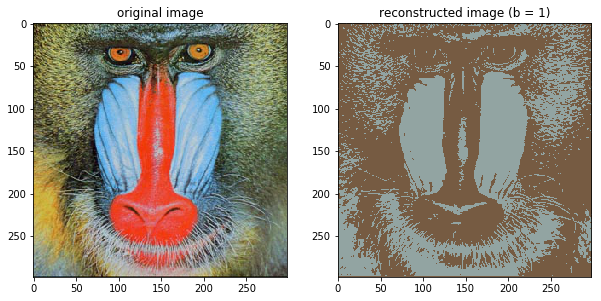

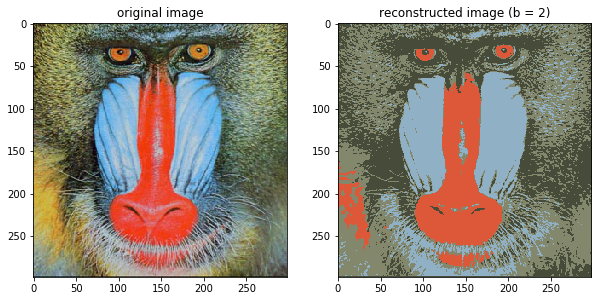

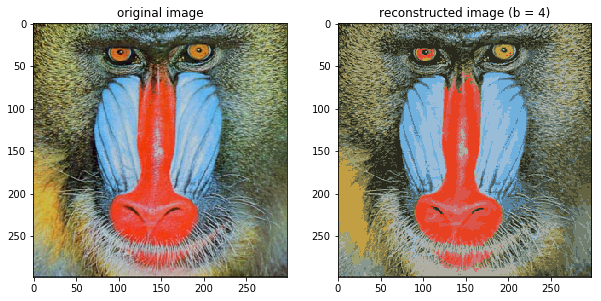

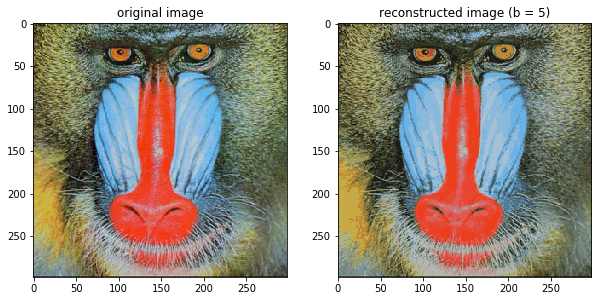

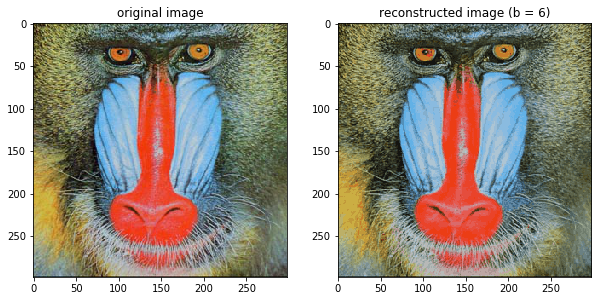

In [12]:

# running for a few values of b
b_vals = [1, 2, 4, 5, 6]
for b in b_vals:
    t0 = time.time()
    compressed, colours = quantize(img, b = b)
    recon = dequantize(compressed, colours)
    fig, ax = plt.subplots(1,2, figsize=(10,10))
    ax[0].imshow(img)
    ax[0].set_title("original image")
    ax[1].imshow(recon) 
    ax[1].set_title(f"reconstructed image (b = {b})");
    t1 = time.time()
    print("Time taken for b = {0} is {1} seconds!".format(b, t1 - t0))

We see that at b = 6, it is almost difficult to differentiate between the original and the constructed image.